In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
df=pd.read_excel("Directory.xlsx")

In [3]:
df.head()

,Company Name,Prefix,Last,First,Middle,home?,dormotory? (do),widow?,beds?,r?,occupation,address,white?
0,NaN,NaN,Acourt,Herbert,H.,True,False,False,False,False,NaN,Beverly Heights,True
1,ADAMS EXPRESS CO.,NaN,McCue,B.,M.,False,False,False,False,False,agent,113 W Main,True
2,NaN,NaN,Agnor,A.,W.,True,False,False,False,False,carpenter,109 N. Jefferson,True
3,NaN,NaN,Airey,I.,W.,True,False,False,False,False,"carpenter,",713 Maple av,True
4,NaN,Miss,Airey,Sallie,NaN,True,False,False,False,False,seamstress,8 S. Augusta,True


In [4]:
df.shape

(3948, 13)

In [5]:
df1=df.address.value_counts()[:10].to_frame()

In [6]:
a=df1.index.tolist()

In [7]:
dfnew=df.loc[df['address'].isin(a)]


In [8]:
dfnew.shape

(302, 13)

In [12]:
def Hratiofun(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y), size = 15)
    plt.show()

In [13]:
#vertical graph ratio function
def Vratiofun(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2-.2  
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x,y), size = 15)
    plt.show()

In [14]:
color = sb.color_palette()[0]


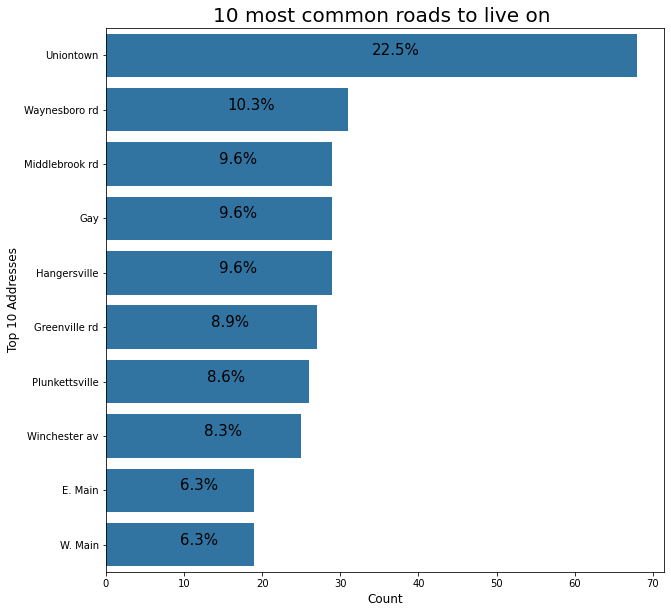

In [15]:
plt.figure(figsize=(10,10))
ax=sb.countplot(data=dfnew,y='address',color=color,order=a)
plt.xlabel("Count",fontsize=12)
plt.ylabel("Top 10 Addresses" ,fontsize=12)
plt.title("10 most common roads to live on ",fontsize=20)
Hratiofun(ax,dfnew.address)

In [16]:
df2=df.Last.value_counts()[:10].to_frame()

In [17]:
b=df2.index.tolist()

In [18]:
dflast=df.loc[df['Last'].isin(b)]

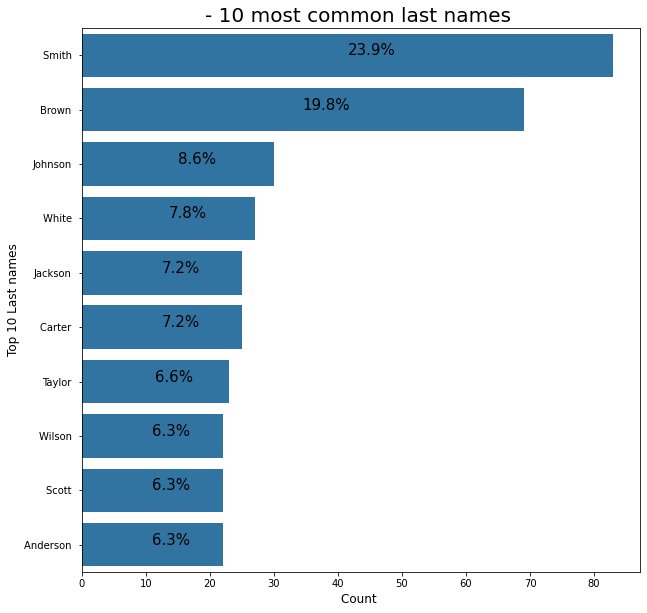

In [19]:
plt.figure(figsize=(10,10))
ax=sb.countplot(data=dflast,y='Last',color=color,order=b)
plt.xlabel("Count ",fontsize=12)
plt.ylabel("Top 10 Last names",fontsize=12)
plt.title("- 10 most common last names ",fontsize=20)
Hratiofun(ax,dflast.Last)

In [20]:
df['occupation']=df['occupation'].str.replace(',', '')
df['occupation']=df['occupation'].str.replace(' ', '')
df['occupation']=df['occupation'].str.replace('.', '')

<ipython-input-20-16e903396c72>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['occupation']=df['occupation'].str.replace('.', '')


In [21]:
dfwest=df[df['address']=='Western State Lunatic Asylum']

In [22]:
dfwest=dfwest.occupation.value_counts().to_frame()

In [23]:
dfwest['occupation'].index

Index(['attendant', 'seamstress', 'laundress', 'assthousekeeper',
       'femalephysician', 'farmer', 'gardener', 'baker'],
      dtype='object')

In [24]:
labels=dfwest.index

In [25]:
data=dfwest.occupation

In [26]:
colors = sb.color_palette('pastel')[0:6]


Text(0.5, 1.0, 'Pie chart of the percentages of different jobs at Western State Lunatic Asylum')

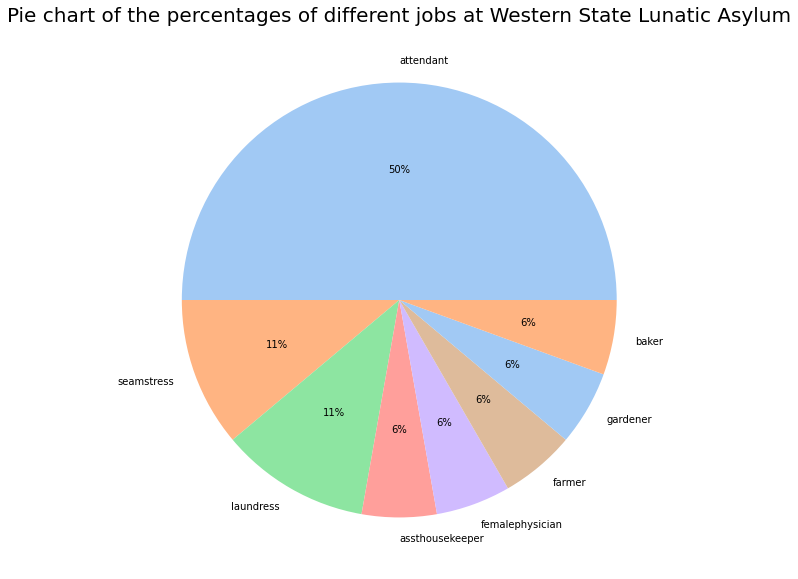

In [27]:
plt.figure(figsize=(10,10))
ax=plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Pie chart of the percentages of different jobs at Western State Lunatic Asylum",fontsize=20)

In [28]:
df.isna().sum()

Company Name       3566
Prefix             3001
Last                 22
First                38
Middle             2337
home?                 0
dormotory? (do)       0
widow?                0
beds?                 0
r?                    0
occupation         1296
address              98
white?                0
dtype: int64

In [29]:
dfwhite=df[df['white?']==True].occupation.value_counts()[:10].to_frame()

In [30]:
x=df[df['white?']==True]

In [31]:
windex=dfwhite.index.tolist()

In [32]:
dfwhite1=x.loc[x['occupation'].isin(windex)]

In [33]:
dfnwhite=df[df['white?']==False].occupation.value_counts()[:10].to_frame()

In [34]:
y=df[df['white?']==False]

In [35]:
nwindex=dfnwhite.index.tolist()

In [36]:
dfnwhite1=y.loc[y['occupation'].isin(nwindex)]

In [37]:
dfwhite1

,Company Name,Prefix,Last,First,Middle,home?,dormotory? (do),widow?,beds?,r?,occupation,address,white?
2,NaN,NaN,Agnor,A.,W.,True,False,False,False,False,carpenter,109 N. Jefferson,True
3,NaN,NaN,Airey,I.,W.,True,False,False,False,False,carpenter,713 Maple av,True
9,NaN,NaN,Alexander,George,NaN,True,False,False,False,False,painter,201 Stalford,True
13,NaN,NaN,Alexander,William,NaN,True,False,False,False,False,painter,201 Stafford,True
19,NaN,NaN,Allman,J.,L.,True,False,False,False,False,printer,902 W. Main,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,NaN,Mrs.,Yeago,M.,E.,True,False,False,False,False,dressmaker,408 Reservoir,True
2827,NaN,NaN,Yeago,W.,H.,True,False,False,False,False,carpenter,1034 King,True
2841,NaN,NaN,Young,L.,D.,True,False,False,False,False,clerk,Middlebrook rd,True
2846,NaN,NaN,Young,William,NaN,True,False,False,False,False,clerk,Greenville av,True


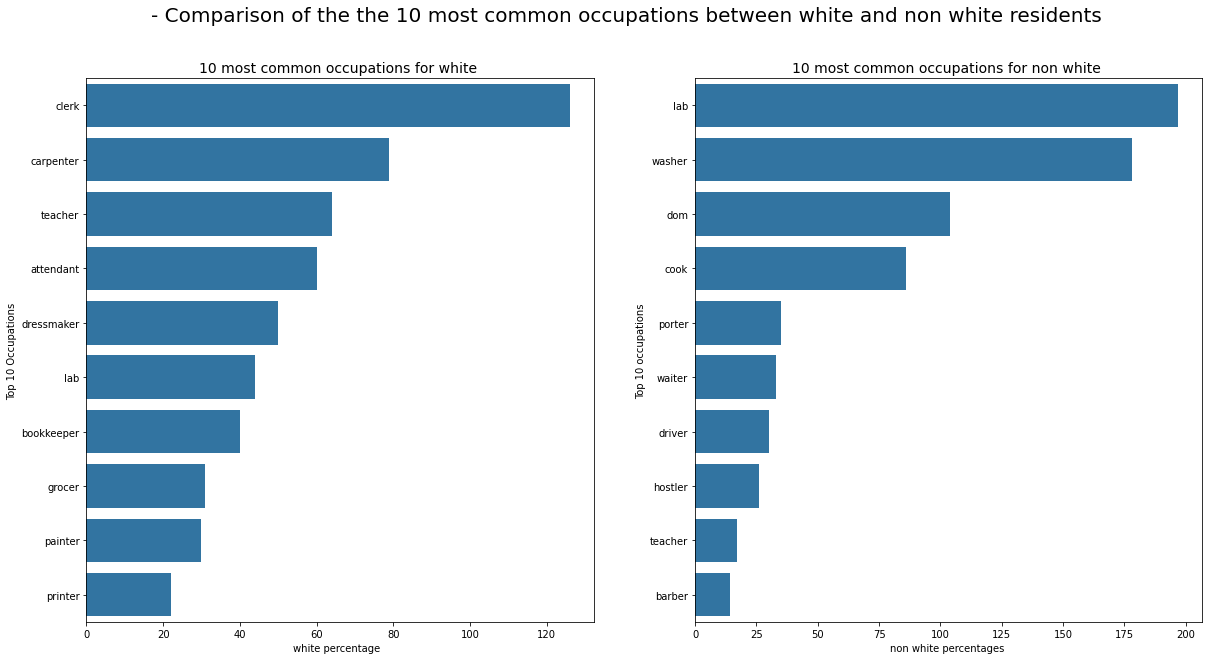

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle("- Comparison of the the 10 most common occupations between white and non white residents",fontsize=20)
ax=sb.countplot(data=dfwhite1,y='occupation',color=color,order=windex)
plt.xlabel("white percentage  ",fontsize=10)
plt.ylabel("Top 10 Occupations",fontsize=10)
plt.title("10 most common occupations for white ",fontsize=14)
plt.subplot(1,2,2)
ax=sb.countplot(data=dfnwhite1,y='occupation',color=color,order=nwindex)
plt.xlabel("non white percentages ",fontsize=10)
plt.ylabel("Top 10 occupations",fontsize=10)
plt.title("10 most common occupations for non white ",fontsize=14)
plt.show()

In [39]:
#plt.figure(figsize=(10,10))
#ax=sb.countplot(data=dfnwhite1,y='occupation',color=color,order=nwindex)
#plt.xlabel("non white percentages ")
#plt.ylabel("Top 10 occupations")
#plt.title("10 most common occupations for non white ")
#Hratiofun(ax,dfnwhite1.occupation)

In [40]:
df.head()

,Company Name,Prefix,Last,First,Middle,home?,dormotory? (do),widow?,beds?,r?,occupation,address,white?
0,NaN,NaN,Acourt,Herbert,H.,True,False,False,False,False,NaN,Beverly Heights,True
1,ADAMS EXPRESS CO.,NaN,McCue,B.,M.,False,False,False,False,False,agent,113 W Main,True
2,NaN,NaN,Agnor,A.,W.,True,False,False,False,False,carpenter,109 N. Jefferson,True
3,NaN,NaN,Airey,I.,W.,True,False,False,False,False,carpenter,713 Maple av,True
4,NaN,Miss,Airey,Sallie,NaN,True,False,False,False,False,seamstress,8 S. Augusta,True


In [41]:
df['Prefix']=df['Prefix'].str.replace(',', '')
df['Prefix']=df['Prefix'].str.replace(' ', '')
df['Prefix']=df['Prefix'].str.replace('.', '')
df['Prefix']=df['Prefix'].str.replace('MRS', 'Mrs')
df['Prefix']=df['Prefix'].str.replace('MISS', 'Miss')

<ipython-input-41-57f5e5532dc0>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Prefix']=df['Prefix'].str.replace('.', '')


In [42]:
df['Prefix'].unique()

array([nan, 'Miss', 'Mrs', 'AstMrs', 'MES', '', 'Mr',
       'EurekaJobPrintingCo', 'FAUVETi', 'Grattan'], dtype=object)

In [43]:
womendf=df[(df['Prefix']=='Miss') | (df['Prefix']=='Mrs')]

In [44]:
data=womendf['widow?'].value_counts().to_frame()

In [45]:
data=data['widow?']

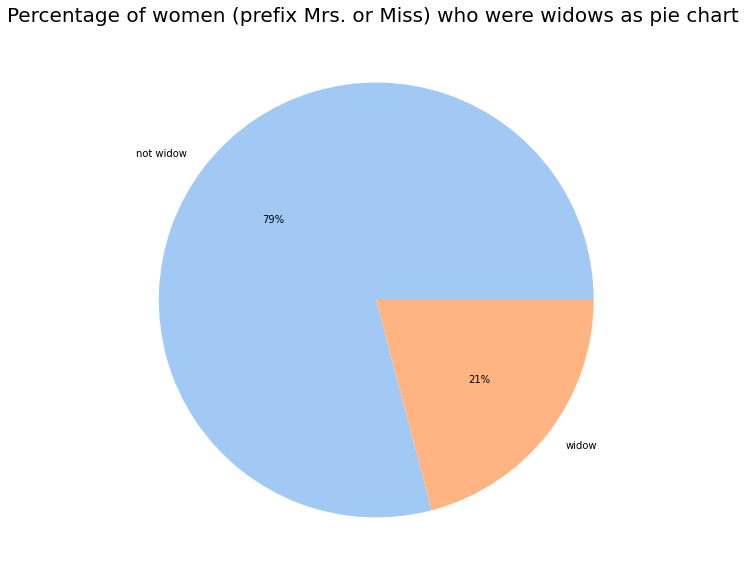

In [46]:
plt.figure(figsize=(10,10))
#ax=sb.countplot(data=womendf,x='widow?',color=color)
#plt.xlabel(" widow ?  ")
#plt.ylabel("Percentage Count")
plt.title("Percentage of women (prefix Mrs. or Miss) who were widows as pie chart ",fontsize=20)
#Vratiofun(ax,womendf['widow?'])
labels=['not widow', 'widow']
colors = sb.color_palette('pastel')[0:2]
ax=plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

In [47]:
dfhome=df[df['home?']==True]

In [48]:
home1=dfhome['white?'].value_counts().to_frame()

In [49]:
hindex=home1.index.tolist()

In [50]:
dfhome1=dfhome.loc[dfhome['white?'].isin(hindex)]

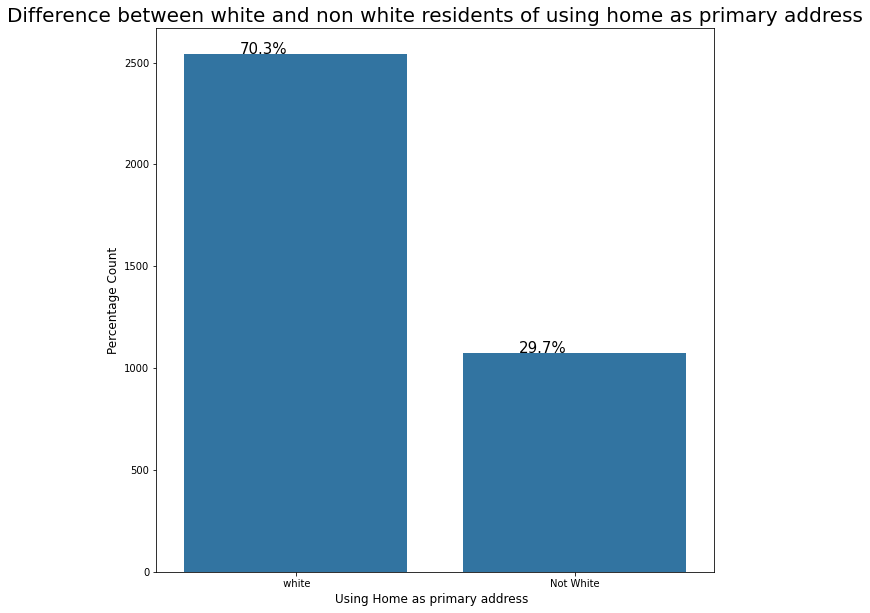

In [51]:
plt.figure(figsize=(10,10))
ax=sb.countplot(data=dfhome1,x='white?',color=color,order=hindex)
plt.xlabel("Using Home as primary address  ",fontsize=12)
plt.xticks([True , False],['Not White', ' white'])
plt.ylabel("Percentage Count",fontsize=12)
plt.title("Difference between white and non white residents of using home as primary address",fontsize=20)
Vratiofun(ax,dfhome1['white?'])



In [52]:
dfhome=df[df['home?']==True]

In [53]:
dfhome['white?'].value_counts()

True     2542
False    1075
Name: white?, dtype: int64